In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


from pycox.datasets import metabric

from xgbse.converters import convert_to_structured
from xgbse import XGBSEDebiasedBCE

In [2]:
# getting data
data = pd.read_parquet("data/train_val_data.parquet.gzip")
data = data.copy()

data.head()

,annual_inc,loan_amnt,fico_average,emp_length,acc_open_past_24mths,avg_cur_bal,sub_grade,int_rate,revol_util,home_ownership_ohe_ANY,home_ownership_ohe_MORTGAGE,home_ownership_ohe_NONE,home_ownership_ohe_OTHER,home_ownership_ohe_OWN,home_ownership_ohe_RENT,target,target_month,target_xgb,term
102206,60000.0,12500,667.0,10.0,4,3204,20,20.31,80.1,0,0,0,0,1,0,0,60,0,60
290018,100000.0,16000,677.0,1.0,3,12519,18,19.03,87.5,0,1,0,0,0,0,0,36,0,36
1426547,74352.0,8400,662.0,10.0,7,15849,6,8.39,17.9,0,1,0,0,0,0,0,36,0,36
741919,100000.0,12000,677.0,2.0,3,16845,16,15.61,62.0,0,1,0,0,0,0,0,60,0,60
1028434,38000.0,16500,692.0,2.0,6,5071,18,16.99,51.7,0,0,0,0,0,1,0,36,0,36


In [3]:
target_cols = [col for col in data.columns if "target" in col] + ['term']
target_cols

['target', 'target_month', 'target_xgb', 'term']

In [4]:
features = ["annual_inc", "loan_amnt", "fico_average", "emp_length", "acc_open_past_24mths", "avg_cur_bal" , "sub_grade", "int_rate", "revol_util"]

features += [col for col in data.columns if "home_ownership_ohe_" in col]

data_used_cols = data[features + target_cols].dropna()
# assert data.shape[0] == data_used_cols.shape[0]

features

['annual_inc',
 'loan_amnt',
 'fico_average',
 'emp_length',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'sub_grade',
 'int_rate',
 'revol_util',
 'home_ownership_ohe_ANY',
 'home_ownership_ohe_MORTGAGE',
 'home_ownership_ohe_NONE',
 'home_ownership_ohe_OTHER',
 'home_ownership_ohe_OWN',
 'home_ownership_ohe_RENT']

In [5]:
# splitting to X, T, E format
X = data_used_cols.drop(['target', 'target_month', 'target_xgb'], axis=1)
T = data_used_cols['target_month']
E = data_used_cols['target']
y = convert_to_structured(T, E)

# splitting between train, and validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
TIME_BINS = np.arange(1, 61, 1)
TIME_BINS

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [6]:
X_train

,annual_inc,loan_amnt,fico_average,emp_length,acc_open_past_24mths,avg_cur_bal,sub_grade,int_rate,revol_util,home_ownership_ohe_ANY,home_ownership_ohe_MORTGAGE,home_ownership_ohe_NONE,home_ownership_ohe_OTHER,home_ownership_ohe_OWN,home_ownership_ohe_RENT,term
1371148,85000.0,18000,717.0,2.0,4,12346,12,12.99,0.5,0,0,0,0,0,1,36
1775534,98000.0,10000,662.0,8.0,8,19999,13,14.08,73.5,0,1,0,0,0,0,36
260171,112950.0,25000,662.0,5.0,3,21391,19,20.00,64.2,0,0,0,0,0,1,60
1636632,25000.0,1800,692.0,2.0,1,4940,16,16.99,81.1,0,0,0,0,0,1,36
991916,71409.0,30000,712.0,10.0,4,32876,9,10.99,81.4,0,1,0,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267159,58800.0,18800,717.0,6.0,0,5000,5,8.19,72.0,0,0,0,0,0,1,36
1823679,90000.0,22000,662.0,5.0,14,4560,17,17.99,56.2,0,0,0,0,0,1,36
932841,115000.0,16200,662.0,0.0,2,2027,11,12.05,35.3,0,0,0,0,0,1,60
1719944,57000.0,9600,662.0,1.0,4,9065,6,8.24,71.7,0,0,0,0,0,1,36


In [7]:
# fitting xgbse model
xgbse_model = XGBSEDebiasedBCE(
    xgb_params = {
        "objective": "survival:aft",
        "eval_metric": "aft-nloglik",
        "aft_loss_distribution": "normal",
        "aft_loss_distribution_scale": 1,
        "tree_method": "hist",
        "learning_rate": 0.025066311555882063,
        "max_depth": 9,
        "booster": "dart",
        "subsample": 0.6647914335903077,
        "min_child_weight": 50,
        "colsample_bynode": 0.5,
    },
    lr_params={'C': 0.001, 'max_iter': 1000}
)

In [8]:
X_train

,annual_inc,loan_amnt,fico_average,emp_length,acc_open_past_24mths,avg_cur_bal,sub_grade,int_rate,revol_util,home_ownership_ohe_ANY,home_ownership_ohe_MORTGAGE,home_ownership_ohe_NONE,home_ownership_ohe_OTHER,home_ownership_ohe_OWN,home_ownership_ohe_RENT,term
1371148,85000.0,18000,717.0,2.0,4,12346,12,12.99,0.5,0,0,0,0,0,1,36
1775534,98000.0,10000,662.0,8.0,8,19999,13,14.08,73.5,0,1,0,0,0,0,36
260171,112950.0,25000,662.0,5.0,3,21391,19,20.00,64.2,0,0,0,0,0,1,60
1636632,25000.0,1800,692.0,2.0,1,4940,16,16.99,81.1,0,0,0,0,0,1,36
991916,71409.0,30000,712.0,10.0,4,32876,9,10.99,81.4,0,1,0,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267159,58800.0,18800,717.0,6.0,0,5000,5,8.19,72.0,0,0,0,0,0,1,36
1823679,90000.0,22000,662.0,5.0,14,4560,17,17.99,56.2,0,0,0,0,0,1,36
932841,115000.0,16200,662.0,0.0,2,2027,11,12.05,35.3,0,0,0,0,0,1,60
1719944,57000.0,9600,662.0,1.0,4,9065,6,8.24,71.7,0,0,0,0,0,1,36


In [9]:
xgbse_model.fit(
    X_train.values, y_train, time_bins=TIME_BINS, num_boost_round=100
)

XGBSEDebiasedBCE(lr_params={'C': 0.001, 'max_iter': 1000},
                 xgb_params={'aft_loss_distribution': 'normal',
                             'aft_loss_distribution_scale': 1,
                             'booster': 'dart', 'colsample_bynode': 0.5,
                             'eval_metric': 'aft-nloglik',
                             'learning_rate': 0.025066311555882063,
                             'max_depth': 9, 'min_child_weight': 50,
                             'objective': 'survival:aft',
                             'subsample': 0.6647914335903077,
                             'tree_method': 'hist'})

<!-- XGBSEDebiasedBCE(lr_params={'C': 0.001, 'max_iter': 500},
                 xgb_params={'aft_loss_distribution': 'normal',
                             'aft_loss_distribution_scale': 1,
                             'booster': 'dart', 'colsample_bynode': 0.5,
                             'eval_metric': 'aft-nloglik',
                             'learning_rate': 0.025066311555882063,
                             'max_depth': 9, 'min_child_weight': 50,
                             'objective': 'survival:aft',
                             'subsample': 0.6647914335903077,
                             'tree_method': 'hist'}) -->

In [10]:
# XGBSEDebiasedBCE(lr_params={'C': 0.001, 'max_iter': 500},
#                  xgb_params={'aft_loss_distribution': 'normal',
#                              'aft_loss_distribution_scale': 1,
#                              'booster': 'dart', 'colsample_bynode': 0.5,
#                              'eval_metric': 'aft-nloglik',
#                              'learning_rate': 0.05, 'max_depth': 8,
#                              'min_child_weight': 50,
#                              'objective': 'survival:aft', 'subsample': 0.5,
#                              'tree_method': 'hist'})

In [11]:
# predicting
y_pred = xgbse_model.predict(X_test)

print(y_pred.shape)
y_pred.head()

(286185, 60)


,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,0.999986,0.997725,0.994496,0.990478,0.985841,0.980523,0.975191,0.969122,0.962965,0.956278,...,0.813922,0.812943,0.812120,0.811390,0.810749,0.810196,0.809794,0.809355,0.809000,0.808777
1,0.999986,0.999177,0.998028,0.996616,0.994641,0.992367,0.990309,0.987570,0.984955,0.981695,...,0.858142,0.857099,0.856223,0.855442,0.854770,0.854190,0.853763,0.853305,0.852931,0.852696
2,0.999986,0.997345,0.992671,0.986518,0.976758,0.968196,0.957228,0.946465,0.934870,0.923133,...,0.699102,0.698182,0.697352,0.696693,0.696104,0.695601,0.695253,0.694867,0.694562,0.694371
3,0.999986,0.998323,0.995859,0.992300,0.987464,0.983342,0.977011,0.969973,0.963040,0.954476,...,0.749544,0.748645,0.747866,0.747199,0.746612,0.746107,0.745736,0.745336,0.745004,0.744800
4,0.999986,0.997366,0.993501,0.988476,0.982135,0.973104,0.963842,0.955449,0.946024,0.936412,...,0.680638,0.679758,0.678945,0.678279,0.677725,0.677218,0.676878,0.676505,0.676199,0.676011


<AxesSubplot:>

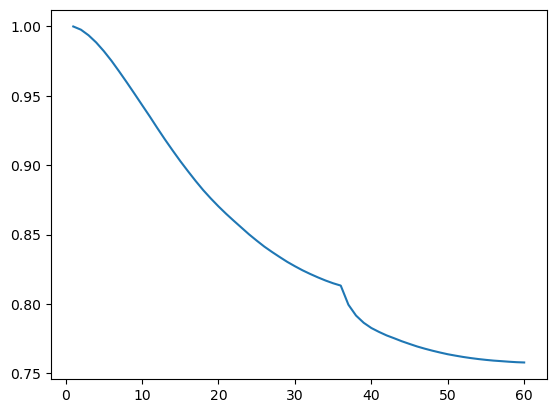

In [12]:
y_pred.mean().plot.line()

In [13]:
y_pred

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,0.999986,0.997725,0.994496,0.990478,0.985841,0.980523,0.975191,0.969122,0.962965,0.956278,...,0.813922,0.812943,0.812120,0.811390,0.810749,0.810196,0.809794,0.809355,0.809000,0.808777
1,0.999986,0.999177,0.998028,0.996616,0.994641,0.992367,0.990309,0.987570,0.984955,0.981695,...,0.858142,0.857099,0.856223,0.855442,0.854770,0.854190,0.853763,0.853305,0.852931,0.852696
2,0.999986,0.997345,0.992671,0.986518,0.976758,0.968196,0.957228,0.946465,0.934870,0.923133,...,0.699102,0.698182,0.697352,0.696693,0.696104,0.695601,0.695253,0.694867,0.694562,0.694371
3,0.999986,0.998323,0.995859,0.992300,0.987464,0.983342,0.977011,0.969973,0.963040,0.954476,...,0.749544,0.748645,0.747866,0.747199,0.746612,0.746107,0.745736,0.745336,0.745004,0.744800
4,0.999986,0.997366,0.993501,0.988476,0.982135,0.973104,0.963842,0.955449,0.946024,0.936412,...,0.680638,0.679758,0.678945,0.678279,0.677725,0.677218,0.676878,0.676505,0.676199,0.676011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286180,0.999986,0.997423,0.994028,0.988490,0.980720,0.973579,0.964416,0.954311,0.943757,0.933541,...,0.713333,0.712382,0.711513,0.710814,0.710217,0.709729,0.709362,0.708965,0.708659,0.708456
286181,0.999986,0.998475,0.995706,0.991469,0.986295,0.981590,0.975349,0.968865,0.961572,0.954748,...,0.759897,0.758973,0.758188,0.757523,0.756930,0.756429,0.756058,0.755646,0.755312,0.755104
286182,0.999986,0.998746,0.997008,0.994823,0.992149,0.989061,0.986033,0.982137,0.978325,0.974494,...,0.853782,0.852748,0.851861,0.851082,0.850411,0.849831,0.849403,0.848945,0.848572,0.848337
286183,0.999986,0.998208,0.995548,0.991586,0.986672,0.982322,0.976766,0.970843,0.965431,0.957943,...,0.792145,0.791060,0.790285,0.789529,0.788905,0.788362,0.787959,0.787549,0.787205,0.786989


In [14]:
# importing metrics
from xgbse.metrics import concordance_index, approx_brier_score

# running metrics
print(f"C-index: {concordance_index(y_test, y_pred)}")
# print(f"Avg. Brier Score: {approx_brier_score(y_test, y_pred)}")

C-index: 0.6845419384213991


C-index: 0.6843114772562473

In [15]:
from joblib import dump, load
dump(xgbse_model, "xgbse_model.pickle")

['xgbse_model.pickle']

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

results = cross_val_score(xgbse_model, X, y, scoring=make_scorer(concordance_index))
results

KeyboardInterrupt: 